In [3]:
import tensorflow as tf
print(tf.__version__)
from keras.preprocessing.image import ImageDataGenerator

2.7.0


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!unzip "/content/gdrive/MyDrive/Colab Notebooks/Keras_Deep_Learning-master.zip"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Keras_Deep_Learning-master.zip
b0e3889ae6ea3fcfb1cb72bc27145a9f42108d18
   creating: Keras_Deep_Learning-master/
  inflating: Keras_Deep_Learning-master/6.jpg  
  inflating: Keras_Deep_Learning-master/Basic_of_Keras.ipynb  
  inflating: Keras_Deep_Learning-master/Cat_Dog_Image_Trining_Model_Keras.ipynb  
  inflating: Keras_Deep_Learning-master/Image_Caption_Tensor_Keras_LSTM.ipynb  
  inflating: Keras_Deep_Learning-master/Image_recognation_Resnet50.ipynb  
  inflating: Keras_Deep_Learning-master/Keras_Basic_Example.ipynb  
  inflating: Keras_Deep_Learning-master/Keras_First_Neural_Network.ipynb  
  inflating: Keras_Deep_Learning-master/Keras_image_generator.ipynb  
  inflating: Keras_Deep_Learning-master/Keras_second_example_sales_data.ipynb  
  inflating: Keras_Deep_Learning-master/Load_saved_model.ipynb  
  inflating: Keras_Deep_Learning-master/README.md  
   creating: Keras_Deep_Learning-master/image_data/
   creating: Keras_Deep_Lea

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_generator=train_datagen.flow_from_directory('/content/Keras_Deep_Learning-master/image_data/training',target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 198 images belonging to 2 classes.


In [7]:
test_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=test_datagen.flow_from_directory('/content/Keras_Deep_Learning-master/image_data/validation',target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [8]:
cnn =tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten()) 

In [13]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [15]:
cnn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history=cnn.fit(x=train_generator, validation_data=validation_generator,epochs=5) 

Epoch 1/5
7/7 [==============================] - 3s 363ms/step - loss: 0.7921 - accuracy: 0.5303 - val_loss: 0.7122 - val_accuracy: 0.5000
Epoch 2/5
7/7 [==============================] - 2s 346ms/step - loss: 0.6918 - accuracy: 0.5556 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/5
7/7 [==============================] - 2s 325ms/step - loss: 0.6895 - accuracy: 0.5909 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 4/5
7/7 [==============================] - 2s 309ms/step - loss: 0.6819 - accuracy: 0.6010 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 5/5
7/7 [==============================] - 2s 327ms/step - loss: 0.6833 - accuracy: 0.5707 - val_loss: 0.7081 - val_accuracy: 0.5000


In [17]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/Keras_Deep_Learning-master/image_data/test/236.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'cat'
else:
  prediction = 'dog'
 

In [18]:
print(prediction) 

dog


In [19]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


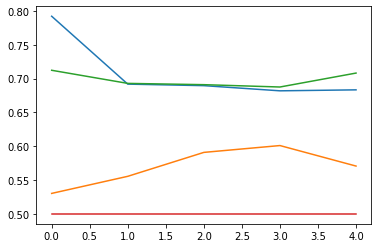

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])